In [ ]:
#objective: Predict chance of survival

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load data
df = pd.read_table('../datasets/hepatitis.data', sep=",", header=None)
df.columns = ['class','age','sex','steroid','antivirals','fatigue','malaise',
'anorexia','liver_big','liver_firm','spleen_palp','spiders','ascites','varices',
              'bilrubin','alk_phosphates','sgot','albumin','protime','histology']

In [3]:
df_backup = df
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palp,spiders,ascites,varices,bilrubin,alk_phosphates,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [4]:
df.shape

(155, 20)

In [5]:
#remove bad data
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()
df.shape

(80, 20)

In [6]:
#perform summary statistics
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palp,spiders,ascites,varices,bilrubin,alk_phosphates,sgot,albumin,protime,histology
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,1.837500,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250
std,0.371236,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539
min,1.000000,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000
25%,2.000000,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000
50%,2.000000,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000
75%,2.000000,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000
max,2.000000,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000


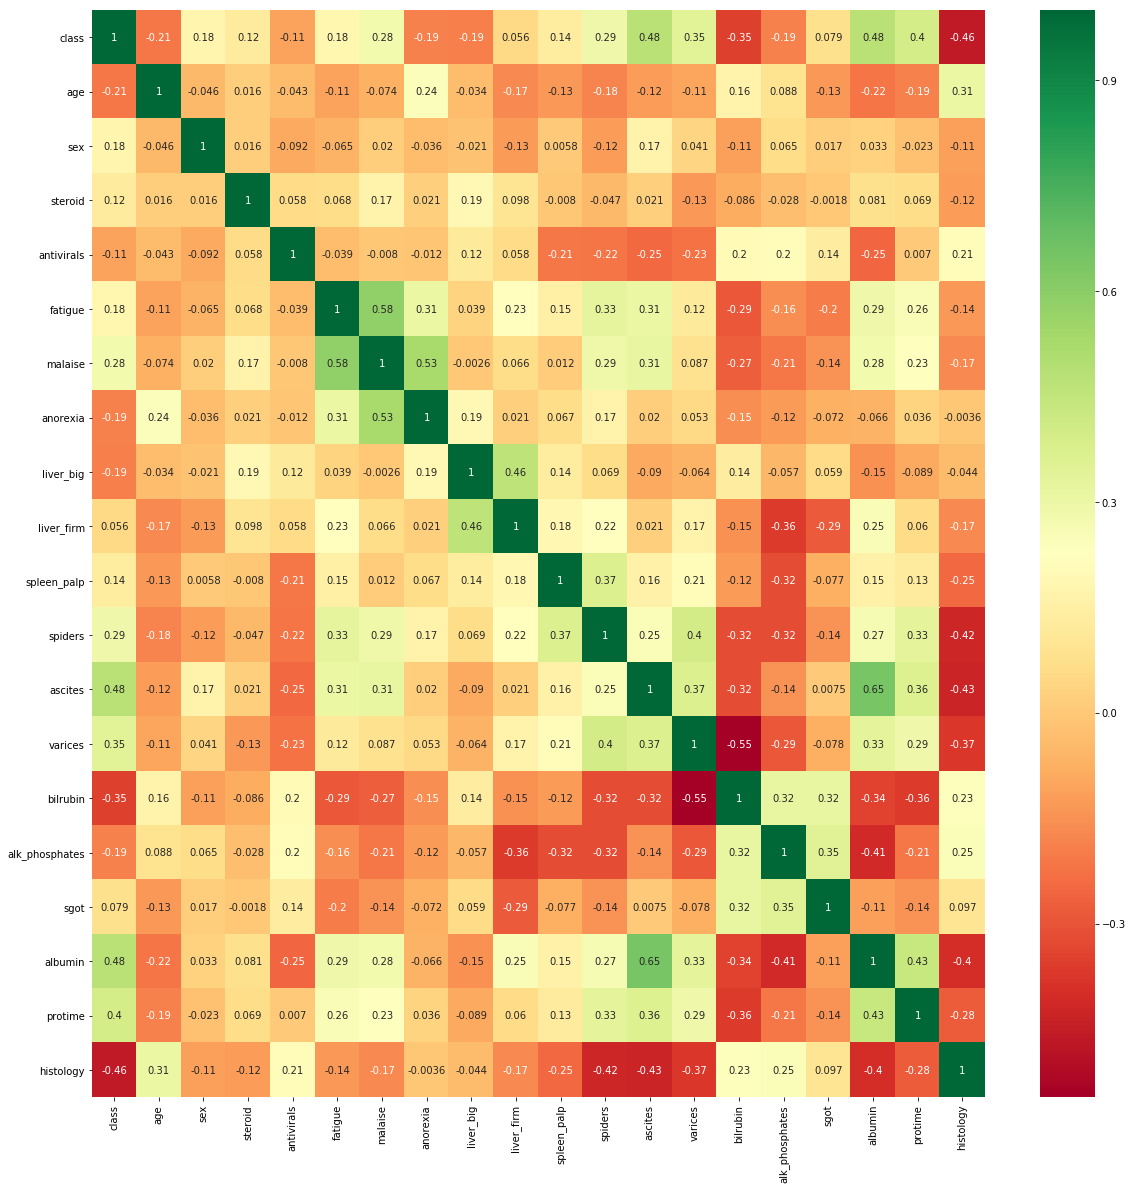

In [7]:
#correlation
x = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [9]:
df_cat = df[['class','sex','steroid','antivirals','fatigue','malaise',
'anorexia','liver_big','liver_firm','spleen_palp','spiders','ascites','varices']]

In [22]:
df_cat2 = pd.get_dummies(df_cat, columns=['class','sex','steroid','antivirals','fatigue','malaise',
'anorexia','liver_big','liver_firm','spleen_palp','spiders','ascites','varices'], drop_first=False)
df_cat2.reset_index(drop=True, inplace=True)

In [14]:
#scale cts data
scaler = preprocessing.MinMaxScaler()
to_scale_df = df[['age','bilrubin','alk_phosphates','sgot','albumin','protime']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['age','bilrubin','alk_phosphates','sgot','albumin','protime'])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [23]:
scaled_df.reset_index(drop=True, inplace=True)

In [24]:
df['histology'].reset_index(drop=True, inplace=True)

In [25]:
#combine data
df_new = pd.concat([scaled_df, df_cat2,df['histology']], axis=1)
df_new.shape

(80, 33)

In [26]:
df_new

,age,bilrubin,alk_phosphates,sgot,albumin,protime,class_1,class_2,sex_1,sex_2,...,liver_firm_2.0,spleen_palp_1.0,spleen_palp_2.0,spiders_1.0,spiders_2.0,ascites_1.0,ascites_2.0,varices_1.0,varices_2.0,histology
0,0.269231,0.133333,0.271654,0.034483,0.655172,0.75,0,1,1,0,...,1,0,1,0,1,0,1,0,1,1
1,0.365385,0.222222,0.204724,0.039409,0.793103,0.85,0,1,1,0,...,0,0,1,0,1,0,1,0,1,1
2,0.230769,0.155556,0.129921,0.578818,0.551724,0.54,0,1,1,0,...,0,0,1,1,0,0,1,0,1,1
3,0.403846,0.133333,0.216535,0.113300,0.620690,0.52,0,1,1,0,...,0,0,1,0,1,0,1,0,1,1
4,0.192308,0.422222,0.122047,0.320197,0.965517,0.78,0,1,1,0,...,0,0,1,0,1,0,1,0,1,1
5,0.346154,0.377778,0.181102,0.184729,0.275862,0.46,0,1,1,0,...,1,0,1,0,1,1,0,0,1,1
6,0.384615,0.066667,0.141732,0.374384,0.655172,0.63,0,1,1,0,...,0,0,1,0,1,0,1,0,1,1
7,0.346154,0.088889,0.106299,0.068966,0.689655,0.85,0,1,1,0,...,1,0,1,0,1,0,1,0,1,2
8,0.346154,0.088889,0.173228,0.034483,0.724138,0.62,0,1,1,0,...,0,0,1,0,1,0,1,0,1,1
9,0.038462,0.133333,0.086614,0.014778,0.724138,0.64,0,1,0,1,...,1,0,1,0,1,0,1,0,1,1


In [27]:
#data split
X = df_new.drop('histology', axis=1)
y = df_new[['histology']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

KNN: 0.700000 (0.244949)
CART: 0.525000 (0.122474)
SVM: 0.725000 (0.248747)
RF: 0.675000 (0.257391)
SGD: 0.637500 (0.240117)
GB: 0.587500 (0.158607)


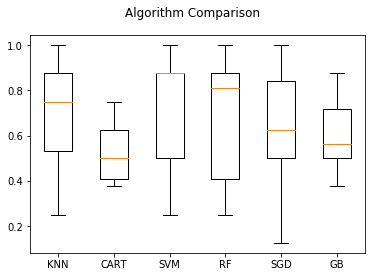

In [28]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_new.values
X = array[:,0:32]
Y = array[:,32]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [29]:
model = SVC()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

In [30]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["1", "2"],
    index=["1", "2"]
)

,1,2
1,11,2
2,3,4


In [40]:
#feature importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = df_new.values
X = array[:,0:32]
Y = array[:,32]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])
print(df_new.columns.tolist() )

[9.028e-01 7.960e-01 7.000e-01 1.394e-01 8.159e-01 5.320e-01 1.398e+01
 2.713e+00 1.414e-01 8.868e-01 5.870e-01 5.311e-01 2.636e+00 9.381e-01
 5.160e-01 9.583e-01 1.374e+00 8.691e-01 8.597e-04 1.517e-04 1.290e-01
 2.503e-02 1.201e+00 1.086e+00 3.998e+00 9.227e-01 9.754e+00 4.434e+00
 1.259e+01 2.221e+00 9.807e+00 1.401e+00]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
['age', 'bilrubin', 'alk_phosphates', 'sgot', 'albumin', 'protime', 'class_1', 'class_2', 'sex_1', 'sex_2', 'steroid_1.0', 'steroid_2.0', 'antivirals_1', 'antivirals_2', 'fatigue_1.0', 'fatigue_2.0', 'malaise_1.0', 'malaise_2.0', 'anorexia_1.0', 'anorexia_2.0', 'liver_big_1.0', 'liver_big_2.0', 'liver_firm_1.0', 'liver_firm_2.0', 'spleen_palp_1.0', 'spleen_palp_2.0', 'spiders_1.0', 'spiders_2.0', 'ascites_1.0', 'ascites_2.0', 'varices_1.0', 'varices_2.0', 'histology']


In [39]:
#2nd feature impotance test
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
array = df_new.values
X = array[:,0:32]
Y = array[:,32]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
print(df_new.columns.tolist() )

[0.058 0.049 0.042 0.063 0.065 0.048 0.043 0.052 0.011 0.007 0.031 0.03
 0.013 0.013 0.029 0.021 0.029 0.003 0.027 0.035 0.02  0.023 0.01  0.005
 0.015 0.017 0.084 0.031 0.034 0.057 0.01  0.024]
['age', 'bilrubin', 'alk_phosphates', 'sgot', 'albumin', 'protime', 'class_1', 'class_2', 'sex_1', 'sex_2', 'steroid_1.0', 'steroid_2.0', 'antivirals_1', 'antivirals_2', 'fatigue_1.0', 'fatigue_2.0', 'malaise_1.0', 'malaise_2.0', 'anorexia_1.0', 'anorexia_2.0', 'liver_big_1.0', 'liver_big_2.0', 'liver_firm_1.0', 'liver_firm_2.0', 'spleen_palp_1.0', 'spleen_palp_2.0', 'spiders_1.0', 'spiders_2.0', 'ascites_1.0', 'ascites_2.0', 'varices_1.0', 'varices_2.0', 'histology']


In [57]:
df_new2 = df_new[['age', 'bilrubin', 'alk_phosphates', 'sgot', 'albumin', 'protime', 'class_1', 'class_2', 'sex_1',
                  'spiders_2.0','histology']]

In [58]:
df_new2.shape

(80, 11)

In [60]:
#data split
X = df_new2.drop('histology', axis=1)
y = df_new2[['histology']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

KNN: 0.675000 (0.178536)
CART: 0.525000 (0.145774)
SVM: 0.687500 (0.238812)
RF: 0.650000 (0.122474)
SGD: 0.637500 (0.264870)
GB: 0.575000 (0.139194)


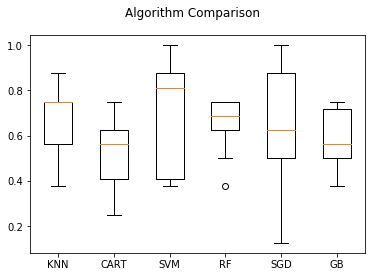

In [61]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_new2.values
X = array[:,0:10]
Y = array[:,10]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()